<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/yfinance/List4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install -q yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from scipy.stats import entropy, kurtosis
import yfinance as yf

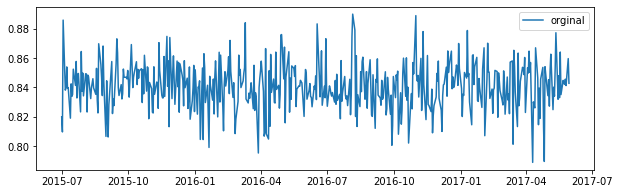

In [34]:
N = 500
scalar = 10
t = pd.date_range('2015-07-01', periods=N, freq=BDay())
# x = np.log(np.cumsum(np.random.randn(N) + 1)) + scalar
x = np.sin(np.random.normal(loc=1, scale=0.03, size=N))

x = pd.Series(x, index=t)

plt.figure(figsize=(10,3))
plt.plot(t,x, label='orginal')
plt.legend()
plt.show()

# Zad 1
Wersja biblioteczna

In [35]:
x.describe()

count    500.000000
mean       0.841048
std        0.016265
min        0.788828
25%        0.831437
50%        0.841077
75%        0.851321
max        0.890047
dtype: float64

In [36]:
print(kurtosis(x, fisher=False))

3.400556799257314


# Zad 2

In [37]:
E = x.apply(lambda x : entropy(N, base=2)).reset_index()

E = entropy(x, base=2)
print(E)

8.965514873577545


In [49]:
def hurst(input_ts, lags_to_test=[2, 100]):
  tau = []
  lagvec = []

  # print(None is input_ts)
  for lag in range(lags_to_test[0], lags_to_test[1]):
    # pp = np.subtract(input_ts[lag:], input_ts[:-lag])
    pp = input_ts[lag:] - input_ts[:-lag]
    # print(pp)
    # print(input_ts[:-lag])
    # print(None is pp)
    lagvec.append(lag)
    tau.append(np.std(pp))

  # print(lagvec)
  # print(tau)

  m = np.polyfit(np.log10(lagvec), np.log10(tau), 1)
  return m[0]

print(hurst(x))

nan


<ipython-input-49-fba799e2f93e>:18: RuntimeWarning: divide by zero encountered in log10
  m = np.polyfit(np.log10(lagvec), np.log10(tau), 1)


# Zad 3


# Zad 4